In [1]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

data = pd.read_csv('Data Numerical.csv')
df = pd.DataFrame(data)
df.head()

,Unnamed: 0,Jenis Kelamin,Usia,Kota,profesi,Tekanan Akademik,Tekanan Kerja,IPK,Kepuasan Belajar,Kepuasan Kerja,Durasi Tidur,Kebiasaan Makan,Gelar Pendidikan,Apakah anda pernah memiliki pikiran untuk bunuh diri,Jam Kerja/Belajar,Tingkat Stress Keuangan,Riwayat Penyakit Mental Dalam Keluarga,Depresi
0,0,1,0.365854,51,11,5.0,0.0,0.897,2.0,0.0,0,0,3,1,0.250000,1.0,0,1
1,1,0,0.146341,3,11,2.0,0.0,0.590,5.0,0.0,0,1,10,0,0.250000,2.0,1,0
2,2,1,0.317073,44,11,3.0,0.0,0.703,5.0,0.0,2,0,5,0,0.750000,1.0,1,0
3,3,0,0.243902,49,11,3.0,0.0,0.559,2.0,0.0,1,1,7,1,0.333333,5.0,1,1
4,4,0,0.170732,16,11,4.0,0.0,0.813,3.0,0.0,0,1,17,1,0.083333,1.0,0,0


In [2]:
# Proses melatih model dengan memisahkan fitur dan target
# x = fitur dan y = target
x = df[['Jenis Kelamin', 'Usia', 'Kota', 'profesi',
       'Tekanan Akademik', 'Tekanan Kerja', 'IPK', 'Kepuasan Belajar',
       'Kepuasan Kerja', 'Durasi Tidur', 'Kebiasaan Makan', 'Gelar Pendidikan',
       'Apakah anda pernah memiliki pikiran untuk bunuh diri',
       'Jam Kerja/Belajar', 'Tingkat Stress Keuangan',
       'Riwayat Penyakit Mental Dalam Keluarga']]

y = df['Depresi']

# Proses memisahkan data latih dan data uji, data uji = 80% dan data latih 20% 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=31)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(x_train, y_train) # proses melatih model



GradientBoostingClassifier(random_state=42)

In [3]:
# menampung hasil prediksi pada variable y_pred
y_pred = gb_model.predict(x_test)


In [4]:
# test peforma model

# acuracy
accuracy = accuracy_score(y_test, y_pred) # membandingkan hasil sebenarnya dengan prediksi dari model
print(f'nilai akurasi : {accuracy}')

nilai akurasi : 0.842831541218638


In [5]:
# precision 
precision = precision_score(y_test, y_pred)
print(f'nilai precision : {precision}')

nilai precision : 0.8506493506493507


In [6]:
# recal
recal = recall_score(y_test, y_pred)
print(f'nilai recall : {recal}')

nilai recall : 0.8859514294497387


In [7]:
# skor f1
skor_f1 = f1_score(y_test, y_pred)
print(f'nilai F1 Score : {skor_f1}')


nilai F1 Score : 0.8679415750639964


In [8]:
# nilai auc
auc = roc_auc_score(y_test, y_pred)
print(f'nilai auc : {auc}')

nilai auc : 0.8342520361687886


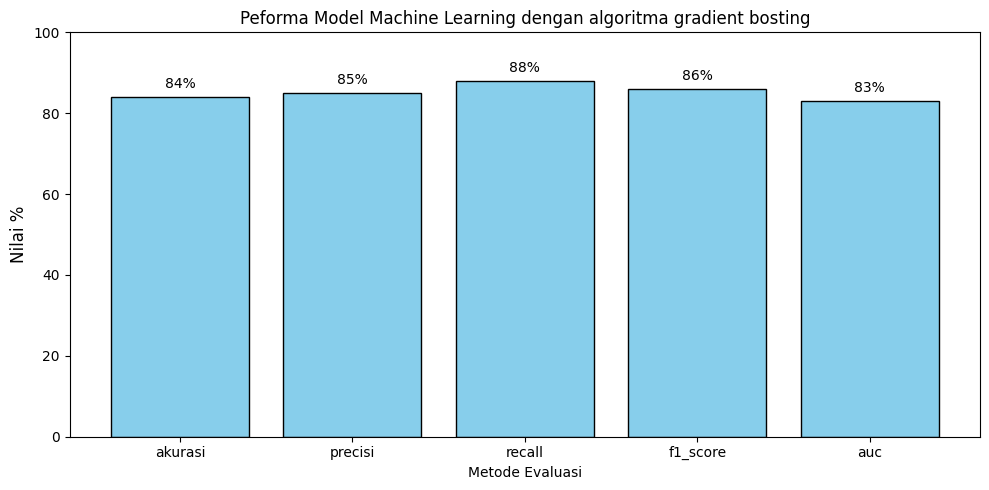

In [11]:
# evaluasi model dengan bar plot
metode = ['akurasi', 'precisi', 'recall', 'f1_score', 'auc']
nilai = [0.84, 0.85, 0.88, 0.86, 0.83]
nilai_persen = [round(v * 100) for v in nilai]
nilai_display = [f'{v}%' for v in nilai_persen]
plt.figure(figsize=(10,5))
bars = plt.bar(metode, nilai_persen, color='skyblue', edgecolor='black')
for bar, val in zip(bars, nilai_display):
    plt.text(bar.get_x() + bar.get_width()/ 2, bar.get_height() + 1.5, val, ha = 'center', va='bottom', fontsize=10)
plt.title('Peforma Model Machine Learning dengan algoritma gradient bosting')
plt.ylabel('Nilai %', fontsize = 12)
plt.xlabel('Metode Evaluasi')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

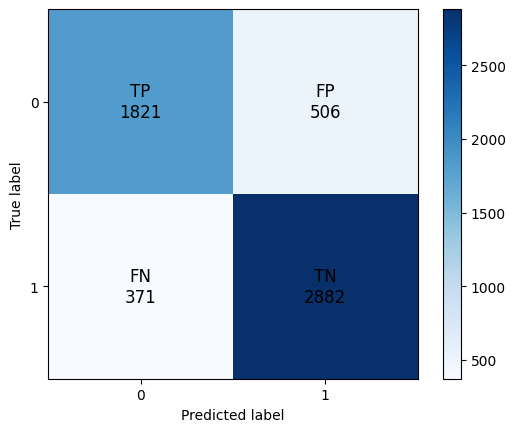

In [10]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
label = np.array([['TP', 'FP'], ['FN', 'TN']])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, include_values=False)

for i in range(2):
    for j in range(2):
        plt.text(j, i, f'{label[i,j]}\n{cm[i,j]}', color='black', ha='center', va='center', fontsize=12)


plt.show()